## 引入将要使用的文件包

In [11]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

## 生成将要参与模型训练的数据集

In [10]:
num_inputs = 2
num_examples = 1000

# set true weight and bias in order to generate corresponded label
true_w = [2, -3.4]
true_b = 4.2

features = torch.randn(num_examples, num_inputs,
                      dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)
print(torch.__version__)

1.3.1


## 将生成的数据集在图形中显示

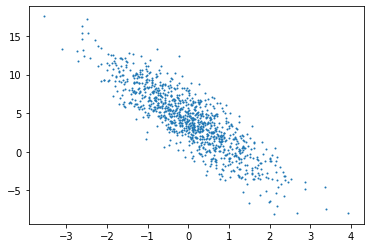

In [12]:
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

## 定义一个函数来读取数据集

In [13]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # random read 10 samples
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # the last time may be not enough for a whole batch
        yield  features.index_select(0, j), labels.index_select(0, j)

In [14]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.1054,  0.7667],
        [ 1.7262,  2.1208],
        [-1.0020,  0.8848],
        [ 1.2475,  1.6107],
        [ 0.6863, -1.2099],
        [-0.4667,  0.1123],
        [-0.1217,  0.1265],
        [-1.3812,  0.4289],
        [ 1.4406, -0.7834],
        [-0.4655, -0.0145]]) 
 tensor([ 1.8056,  0.4534, -0.8168,  1.1972,  9.6823,  2.8810,  3.5365, -0.0463,
         9.7306,  3.3219])


In [15]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

### 定义模型
定义用来训练参数的训练模型：

$$
\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b
$$

In [16]:
#定义一个函数解析：
def linreg(X, w, b):
    return torch.mm(X, w) + b

### 定义损失函数
我们使用的是均方误差损失函数：
$$
l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2,
$$

In [21]:
def squared_loss(y_hat, y): 
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

## 定义优化函数 随机梯度下降

In [19]:
def sgd(params, lr, batch_size): 
    for param in params:
        param.data -= lr * param.grad / batch_size # ues .data to operate param without gradient track

### 训练
当数据集、模型、损失函数和优化函数定义完了之后就可来准备进行模型的训练了。  
开始求模型的参数

In [22]:
lr = 0.03
num_epochs = 5
net = linreg
loss = squared_loss

# training
for epoch in range(num_epochs):  # training repeats num_epochs times
    # in each epoch, all the samples in dataset will be used once
    
    # X is the feature and y is the label of a batch sample
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  
        # calculate the gradient of batch sample loss 
        l.backward()  
        # using small batch random gradient descent to iter model parameters
        sgd([w, b], lr, batch_size)  
        # reset parameter gradient
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.033646
epoch 2, loss 0.000120
epoch 3, loss 0.000049
epoch 4, loss 0.000049
epoch 5, loss 0.000049


### 与生成数据集的原参数进行比较

In [23]:
w, true_w, b, true_b

(tensor([[ 2.0003],
         [-3.3998]], requires_grad=True),
 [2, -3.4],
 tensor([4.2000], requires_grad=True),
 4.2)